<a href="https://colab.research.google.com/github/e19166/e19-4yp-Dynamic-Multi-Dimensional-Resource-Orchestration-in-Kubernetes/blob/main/results/hashgen_memory_reduction_without_throttling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df = pd.read_csv('hash-gen_deployment_memory_reducition_without_throttling.csv')
df.head()  # to preview the data

,Timestamp,Service,CPU Request,Memory Request,CPU Limit,Memory Limit,Latency,CPU Usage,Memory Usage
0,2025-05-18T13:51:52.403000,hash-gen-deployment,0.1,134217728,0.12,209715200,0.017688,0.022474,161038336
1,2025-05-18T13:52:22.484000,hash-gen-deployment,0.1,134217728,0.12,209715200,0.018045,0.022792,161038336
2,2025-05-18T13:52:52.563000,hash-gen-deployment,0.1,134217728,0.12,209715200,0.018045,0.023472,161038336
3,2025-05-18T13:53:22.639000,hash-gen-deployment,0.1,134217728,0.12,209715200,0.018369,0.023668,161038336
4,2025-05-18T13:53:52.719000,hash-gen-deployment,0.1,134217728,0.12,209715200,0.018961,0.024252,161038336


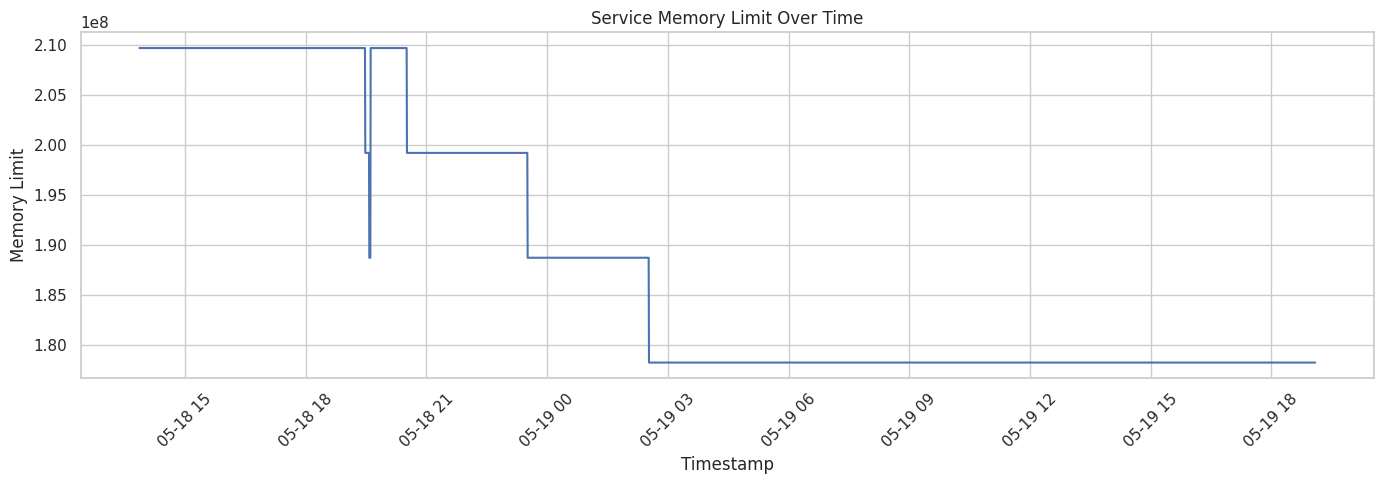

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='mixed')


# Set visual style
sns.set(style="whitegrid")

# Plotting functions
def plot_time_series(x, y, ylabel, title):
  plt.figure(figsize=(14, 5))
  sns.lineplot(x=x, y=y)
  plt.ylabel(ylabel)
  plt.xlabel("Timestamp")
  plt.title(title)
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

# 1. Latency over time
plot_time_series(df['Timestamp'], df['Memory Limit'], 'Memory Limit', 'Service Memory Limit Over Time')